In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats
from scipy.stats import describe
from statistics import mean
from statistics import stdev
import warnings # Turn off warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
import statsmodels.formula.api as smf 
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, lars_path, ElasticNet

In [2]:
#Imports
data_df = pd.read_csv(r"data/processed-csv/bishop-proc-log-sqrt-df.csv")
data_df = data_df.drop(columns = {"Unnamed: 0"}).dropna()
data_df

,Route,ID,Avg Stars,Grade,Length,Area Latitude,Area Longitude,StarRatings,SuggestedRatings,OnToDoLists,...,Log Ticks,Log Avg Stars,Log Length,Log Grade,Log OnToDoLists,Sqrt StarRatings,Sqrt Ticks,Sqrt Avg Stars,Sqrt Length,Sqrt Grade
0,The Way Down,106277533,1.3,-1.00,10.0,37.33004,-118.57901,30,5,8,...,1.724276,0.361728,1.041393,0.000000,0.954243,5.477226,7.211103,1.140175,3.162278,0.000000
1,Choke the Chicken,116715444,2.0,-1.00,15.0,37.31826,-118.57440,1,1,0,...,0.301030,0.477121,1.204120,0.000000,0.000000,1.000000,1.000000,1.414214,3.872983,0.000000
2,Unnamed 1,1070327761,2.2,-0.25,18.0,37.32859,-118.57516,41,6,11,...,1.944483,0.505150,1.278754,0.243038,1.079181,6.403124,9.327379,1.483240,4.242641,0.866025
3,Unnamed 2,1070327802,2.8,-0.25,18.0,37.32859,-118.57516,84,20,49,...,2.227887,0.579784,1.278754,0.243038,1.698970,9.165151,12.961481,1.673320,4.242641,0.866025
4,Problem B,106322572,1.8,-0.25,12.0,37.32873,-118.57534,46,15,12,...,2.012837,0.447158,1.113943,0.243038,1.113943,6.782330,10.099505,1.341641,3.464102,0.866025
5,Hip Hop Hager,107519098,1.6,-0.25,16.0,37.33014,-118.57777,5,1,2,...,0.698970,0.414973,1.230449,0.243038,0.477121,2.236068,2.000000,1.264911,4.000000,0.866025
6,Unknown V0/V1,10644277101,1.8,-0.25,12.0,37.33022,-118.57882,8,1,7,...,1.462398,0.447158,1.113943,0.243038,0.903090,2.828427,5.291503,1.341641,3.464102,0.866025
7,Xenolith Slab,116715297,2.0,-0.25,10.0,37.31821,-118.57395,1,1,0,...,0.301030,0.477121,1.041393,0.243038,0.000000,1.000000,1.000000,1.414214,3.162278,0.866025
8,Backside Crack,108010816,2.3,0.00,20.0,37.33880,-118.57760,31,6,5,...,1.556303,0.518514,1.322219,0.301030,0.778151,5.567764,5.916080,1.516575,4.472136,1.000000
9,Burned and Bare,108880968,2.7,0.00,15.0,37.33880,-118.57760,12,3,2,...,1.000000,0.568202,1.204120,0.301030,0.477121,3.464102,3.000000,1.643168,3.872983,1.000000


In [3]:
# 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state = 72)
scaler = StandardScaler()

In [4]:
# Set aside 20% of data for final test
features_train_all_df, features_test_all_df, target_train_ser, target_test_ser = train_test_split(data_df.drop(columns = ['OnToDoLists']), data_df['OnToDoLists'], test_size=.2, random_state=42)

# Choose features, KFold requires ndarray inputs
features_list = ['StarRatings', 'Ticks', 'Avg Stars', 'Length', 'Grade']

features_train_chosen_df = features_train_all_df[features_list]
features_train_chosen_array = np.array(features_train_chosen_df)
features_test_chosen_df = features_test_all_df[features_list]
features_test_chosen_array = np.array(features_test_chosen_df)
target_train_array = np.array(target_train_ser)
target_test_array = np.array(target_test_ser)

In [5]:
# Scikit Learn's LinearRegression

# Initialize Model
linreg =  LinearRegression()
r2_cv_list = [] # Collect the cross-validation results

for train_index, val_cv_index in kf.split(features_train_chosen_array, target_train_array):
    
    # Make split
    features_train_cv_array, target_train_cv_array = features_train_chosen_array[train_index], target_train_array[train_index]
    features_val_cv_array, target_val_cv_array = features_train_chosen_array[val_cv_index], target_train_array[val_cv_index] 
    
    # Standard Scaler on Features
    features_train_cv_scaled_array = scaler.fit_transform(features_train_cv_array)
    features_val_cv_scaled_array = scaler.transform(features_val_cv_array)
    
    # Fit model
    linreg.fit(features_train_cv_scaled_array, target_train_cv_array)
    
    # Collect results
    SSE = sum((target_val_cv_array - linreg.predict(features_val_cv_scaled_array))**2)
    SST = sum((target_val_cv_array - np.mean(target_val_cv_array))**2)
    r2_cv_score = 1-SSE/SST
    r2_cv_list.append(r2_cv_score)

print(r2_cv_list)
print('r2_cv_score: ', mean(r2_cv_list),' +/- ', stdev(r2_cv_list))

# Test
features_train_scaled_array = scaler.fit_transform(features_train_chosen_df)
features_test_scaled_array = scaler.transform(features_test_chosen_df)
linreg.fit(features_train_scaled_array, target_train_ser) # Fit model

SSE = sum((target_test_ser - linreg.predict(features_test_scaled_array))**2)
SST = sum((target_test_ser - np.mean(target_test_ser))**2)
r2_test_score = 1-SSE/SST

print('r2_test_score: ', r2_test_score) #Get score
print(linreg.coef_)

[0.870922334805144, 0.7399871526811761, 0.6989487934992047, 0.8098125189399525, 0.8057584444136068]
r2_cv_score:  0.7850858488678168  +/-  0.06682093878949044
r2_test_score:  0.6426057149839702
[ 162.79335556 -119.0719405     3.35828707    0.93340456    0.2348178 ]


In [6]:
# Statsmodels OLS

r2_cv_list = [] # Collect the cross-validation results

for train_index, val_cv_index in kf.split(features_train_chosen_array, target_train_array):
    
    # Make the split
    features_train_cv_array, target_train_cv_array = features_train_chosen_array[train_index], target_train_array[train_index]
    features_val_cv_array, target_val_cv_array = features_train_chosen_array[val_cv_index], target_train_array[val_cv_index] 
    
    # Rebalance train features, no need to rebalance validation set, resample is better than smote
    features_train_cv_scaled_array = scaler.fit_transform(features_train_cv_array)  # Scale resampled features
    features_val_cv_scaled_array = scaler.transform(features_val_cv_array)  # Scale validation features
    
    ols_model = sm.OLS(target_train_cv_array, sm.add_constant(features_train_cv_scaled_array))
    ols_results = ols_model.fit() # Fit model
    
    # Collect results on the validation set
    SSE = sum((target_val_cv_array - ols_results.predict(sm.add_constant(features_val_cv_scaled_array)))**2)
    SST = sum((target_val_cv_array - np.mean(target_val_cv_array))**2)
    r2_cv_list.append(1-SSE/SST)

print(r2_cv_list)
print('val_r2_score: ', mean(r2_cv_list),' +/- ', stdev(r2_cv_list))

# Test
features_train_scaled_array = scaler.fit_transform(features_train_chosen_df)
features_test_scaled_array = scaler.transform(features_test_chosen_df)

# Fit model
ols_model = sm.OLS(target_train_ser, sm.add_constant(features_train_scaled_array))
ols_results = ols_model.fit()

# Collect results on the test set
SSE = sum((target_test_ser - ols_results.predict(sm.add_constant(features_test_scaled_array)))**2)
SST = sum((target_test_ser - np.mean(target_test_ser))**2)

print('test_r2_score: ', 1-SSE/SST) #Get score
print(list(ols_results.params[1:]))

[0.8709223348051442, 0.7399871526811754, 0.6989487934992046, 0.8098125189399527, 0.8057584444136089]
val_r2_score:  0.7850858488678172  +/-  0.06682093878949083
test_r2_score:  0.642605714983973
[162.79335555922546, -119.07194050384467, 3.3582870717035624, 0.9334045637874019, 0.2348177986247726]


In [7]:
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:            OnToDoLists   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     638.8
Date:                Thu, 11 Jul 2019   Prob (F-statistic):          8.91e-277
Time:                        18:10:18   Log-Likelihood:                -3755.7
No. Observations:                 808   AIC:                             7523.
Df Residuals:                     802   BIC:                             7552.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.1089      0.892     22.545      0.0

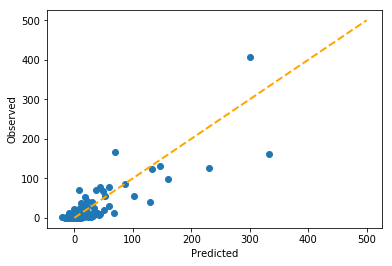

In [8]:
ax = plt.scatter(ols_results.predict(sm.add_constant(features_test_scaled_array)), target_test_ser)
plt.plot([0, 500], [0, 500], c='orange', lw = 2, ls='--', label= "Equal")
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.savefig("figures/bishop/linear/predicted-vs-observed.png", transparent=True, bbox_inches="tight")
plt.show()

1.6032453906900417


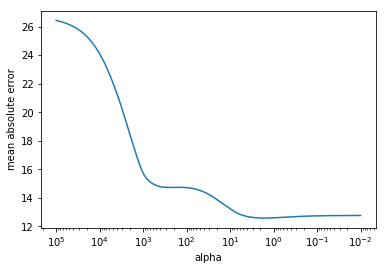

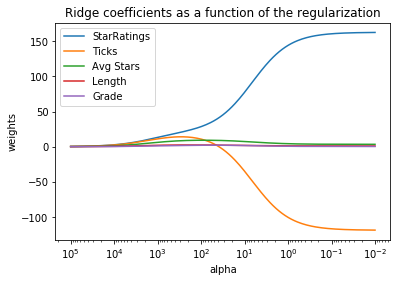

In [9]:
# Ridge Gridsearch

alpha_list = 10**(np.linspace(-2,5,201)) # Generate a list of 10^(x) 
mae_list, r2_list, coefs_list = [], [], []

for i,curr_alpha in enumerate(alpha_list):
    
    # Initialize Model
    ridgereg = Ridge(alpha = curr_alpha, random_state=123)
    mae_cv_list, r2_cv_list, coefs_cv_list = [], [], [] # Collect the cross-validation results
    
    for train_index, val_index in kf.split(features_train_chosen_array, target_train_array):
        
        # Make split
        features_train_cv_array, target_train_cv_array = features_train_chosen_array[train_index], target_train_array[train_index]
        features_val_cv_array, target_val_cv_array = features_train_chosen_array[val_index], target_train_array[val_index] 

        # Standard Scaler on Features
        features_train_cv_scaled_array = scaler.fit_transform(features_train_cv_array)
        features_val_cv_scaled_array = scaler.transform(features_val_cv_array)

        # Fit model
        ridgereg.fit(features_train_cv_scaled_array, target_train_cv_array)
        target_val_cv_predict_array = ridgereg.predict(features_val_cv_scaled_array)
        
        # Collect results
        mae_cv_list.append(np.mean(np.abs(target_val_cv_predict_array - target_val_cv_array)))
        r2_cv_list.append(ridgereg.score(features_val_cv_scaled_array, target_val_cv_array))
        coefs_cv_list.append(ridgereg.coef_)
        
    # Collect Results Average for K-Fold Cross Validation
    mae_list.append(np.mean(mae_cv_list))
    r2_list.append(mean(r2_cv_list))
    coefs_cv_array = np.stack(coefs_cv_list, axis = 0)
    coefs_cv_mean_array = np.mean(coefs_cv_array, axis = 0)
    coefs_list.append(coefs_cv_mean_array)
    
# Print alpha value that gave the lowest mean absolute error
print(alpha_list[np.argmin(mae_list)])

#plot the curve of validation error as alpha changes
ax = plt.gca()
ax.plot(alpha_list, mae_list)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('mean absolute error')
ax.set_xlim(ax.get_xlim()[::-1])
plt.savefig("figures/bishop/ridge/mae-vs-alpha.png", transparent=True, bbox_inches="tight")
plt.show()

# Plot the coefficients as the alphas change
ax = plt.gca()
ax.set_xscale('log')
ax.plot(alpha_list, coefs_list[:])
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.legend(features_train_chosen_df.columns)
plt.savefig("figures/bishop/ridge/weights-vs-alpha.png", transparent=True, bbox_inches="tight")
plt.show()

In [10]:
# Ridge Regression
ridgereg = Ridge(alpha=1.6032453906900417)

# KFold Cross-Validation
cv_r2_list = [] # Collect the cross-validation results

for train_index, val_cv_index in kf.split(features_train_chosen_array, target_train_array):
    
    # Make the split
    features_train_cv_array, target_train_cv_array = features_train_chosen_array[train_index], target_train_array[train_index]
    features_val_cv_array, target_val_cv_array = features_train_chosen_array[val_cv_index], target_train_array[val_cv_index] 
    
    # Rebalance train features, no need to rebalance validation set, resample is better than smote
    features_train_cv_scaled_array = scaler.fit_transform(features_train_cv_array)  # Scale resampled features
    features_val_cv_scaled_array = scaler.transform(features_val_cv_array)  # Scale validation features
    
    ridgereg.fit(features_train_cv_scaled_array, target_train_cv_array) # Fit model
    cv_r2_list.append(ridgereg.score(features_val_cv_scaled_array, target_val_cv_array)) # Collect results

print(cv_r2_list)
print('val_r2_score: ', mean(cv_r2_list),' +/- ', stdev(cv_r2_list))

# Test
features_train_scaled_array = scaler.fit_transform(features_train_chosen_df)
features_test_scaled_array = scaler.transform(features_test_chosen_df)
ridgereg.fit(features_train_scaled_array, target_train_ser) # Fit model

print('test_r2_score: ', ridgereg.score(features_test_scaled_array, target_test_ser)) #Get score
print(ridgereg.coef_)

[0.8702136451775305, 0.7311377788741866, 0.6806860129977419, 0.7965607342562643, 0.8506887116156423]
val_r2_score:  0.7858573765842731  +/-  0.07982620811892865
test_r2_score:  0.6582658734198588
[139.91491423 -96.50583641   4.43967005   1.17183445   0.60434823]


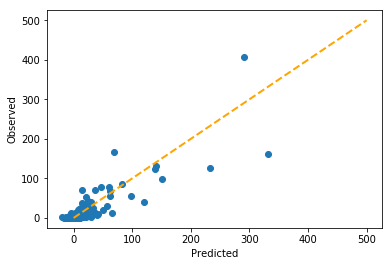

In [11]:
ax = plt.scatter(ridgereg.predict(features_test_scaled_array), target_test_ser)
plt.plot([0, 500], [0, 500], c='orange', lw = 2, ls='--', label= "Equal")
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.savefig("figures/bishop/ridge/predicted-vs-observed.png", transparent=True, bbox_inches="tight")
plt.show()

0.4466835921509635


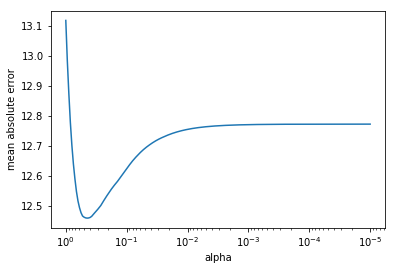

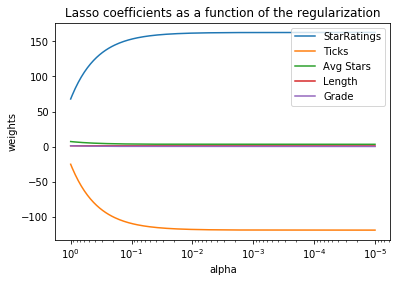

In [12]:
# Lasso Gridsearch

alpha_list = 10**(np.linspace(-5,0,201)) # Generate a list of 10^(x) 
mae_list, r2_list, coefs_list = [], [], []

for i,curr_alpha in enumerate(alpha_list):
    
    # Initialize Model
    lasso_model = Lasso(alpha = curr_alpha, random_state=123)
    
    mae_cv_list, r2_cv_list, coefs_cv_list = [], [], [] # Collect the cross-validation results
    
    for train_index, val_cv_index in kf.split(features_train_chosen_array, target_train_array):
        
        # Make split
        features_train_cv_array, target_train_cv_array = features_train_chosen_array[train_index], target_train_array[train_index]
        features_val_cv_array, target_val_cv_array = features_train_chosen_array[val_cv_index], target_train_array[val_cv_index] 

        # Standard Scaler on Features
        features_train_cv_scaled_array = scaler.fit_transform(features_train_cv_array)
        features_val_cv_scaled_array = scaler.transform(features_val_cv_array)

        # Fit model
        lasso_model.fit(features_train_cv_scaled_array, target_train_cv_array)
        target_val_cv_predict_array = lasso_model.predict(features_val_cv_scaled_array)
        
        # Collect results
        mae_cv_list.append(np.mean(np.abs(target_val_cv_predict_array - target_val_cv_array)))
        r2_cv_list.append(lasso_model.score(features_val_cv_scaled_array, target_val_cv_array))
        coefs_cv_list.append(lasso_model.coef_)
        
    # Collect Results Average for K-Fold Cross Validation
    mae_list.append(np.mean(mae_cv_list))
    r2_list.append(mean(r2_cv_list))
    coefs_cv_array = np.stack(coefs_cv_list, axis = 0)
    coefs_cv_mean_array = np.mean(coefs_cv_array, axis = 0)
    coefs_list.append(coefs_cv_mean_array)

# Print alpha value that gave the lowest mean absolute error
print(alpha_list[np.argmin(mae_list)])

#plot the curve of validation error as alpha changes
ax = plt.gca()
ax.plot(alpha_list, mae_list)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('mean absolute error')
ax.set_xlim(ax.get_xlim()[::-1])
plt.savefig("figures/bishop/lasso/mae-vs-alpha.png", transparent=True, bbox_inches="tight")
plt.show()

# Plot the coefficients as the alphas change
ax = plt.gca()
ax.set_xscale('log')
ax.plot(alpha_list, coefs_list[:])
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.legend(features_train_chosen_df.columns)
plt.savefig("figures/bishop/lasso/weights-vs-alpha.png", transparent=True, bbox_inches="tight")
plt.show()

In [13]:
# Lasso
lasso_model = Lasso(alpha = 0.4466835921509635)

# KFold Cross-Validation

cv_r2_list = [] # Collect the cross-validation results

for train_index, val_cv_index in kf.split(features_train_chosen_array, target_train_array):
    
    # Make the split
    features_train_cv_array, target_train_cv_array = features_train_chosen_array[train_index], target_train_array[train_index]
    features_val_cv_array, target_val_cv_array = features_train_chosen_array[val_cv_index], target_train_array[val_cv_index] 
    
    # Rebalance train features, no need to rebalance validation set, resample is better than smote
    features_train_cv_scaled_array = scaler.fit_transform(features_train_cv_array)  # Scale resampled features
    features_val_cv_scaled_array = scaler.transform(features_val_cv_array)  # Scale validation features
    
    lasso_model.fit(features_train_cv_scaled_array, target_train_cv_array) # Fit model
    cv_r2_list.append(lasso_model.score(features_val_cv_scaled_array, target_val_cv_array)) # Collect results
    
print(cv_r2_list)
print('val_r2_score: ', mean(cv_r2_list),' +/- ', stdev(cv_r2_list))

# Test
features_train_scaled_array = scaler.fit_transform(features_train_chosen_df)
features_test_scaled_array = scaler.transform(features_test_chosen_df)
lasso_model.fit(features_train_scaled_array, target_train_ser) # Fit model

print('test_r2_score: ', lasso_model.score(features_test_scaled_array, target_test_ser)) #Get score
print(lasso_model.coef_) #Get score

[0.864988540433267, 0.7202993142291522, 0.6628631104482473, 0.7859257549212856, 0.8626957670569139]
val_r2_score:  0.7793544974177732  +/-  0.08857185765375235
test_r2_score:  0.6646699046091014
[120.74689983 -77.46670644   5.10345806   1.06560837   0.65572587]


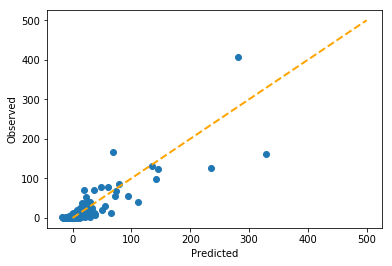

In [14]:
ax = plt.scatter(lasso_model.predict(features_test_scaled_array), target_test_ser)
plt.plot([0, 500], [0, 500], c='orange', lw = 2, ls='--', label= "Equal")
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.savefig("figures/bishop/lasso/predicted-vs-observed.png", transparent=True, bbox_inches="tight")
plt.show()

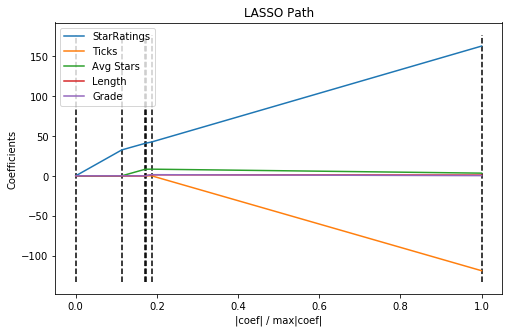

In [15]:
#Computing regularization path for Lasso using the LARS
alphas_array, active_indices_list, coefs_array = lars_path(features_train_scaled_array, target_train_ser.values, method='lasso')

# plotting the LARS path

xx = np.sum(np.abs(coefs_array.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(8,5))
plt.plot(xx, coefs_array.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(features_train_chosen_df.columns)
plt.savefig("figures/bishop/lasso/lasso-lars-path.png", transparent=True, bbox_inches="tight")
plt.show()

In [16]:
# Lasso
elastic_net = ElasticNet(random_state=1)

# KFold Cross-Validation

cv_r2_list = [] # Collect the cross-validation results

for train_index, val_cv_index in kf.split(features_train_chosen_array, target_train_array):
    
    # Make the split
    features_train_cv_array, target_train_cv_array = features_train_chosen_array[train_index], target_train_array[train_index]
    features_val_cv_array, target_val_cv_array = features_train_chosen_array[val_cv_index], target_train_array[val_cv_index] 
    
    # Rebalance train features, no need to rebalance validation set, resample is better than smote
    features_train_cv_scaled_array = scaler.fit_transform(features_train_cv_array)  # Scale resampled features
    features_val_cv_scaled_array = scaler.transform(features_val_cv_array)  # Scale validation features
    
    elastic_net.fit(features_train_cv_scaled_array, target_train_cv_array) # Fit model
    cv_r2_list.append(elastic_net.score(features_val_cv_scaled_array, target_val_cv_array)) # Collect results
    
print(cv_r2_list)
print('val_r2_score: ', mean(cv_r2_list),' +/- ', stdev(cv_r2_list))

# Test
features_train_scaled_array = scaler.fit_transform(features_train_chosen_df)
features_test_scaled_array = scaler.transform(features_test_chosen_df)
elastic_net.fit(features_train_scaled_array, target_train_ser) # Fit model

print('test_r2_score: ', elastic_net.score(features_test_scaled_array, target_test_ser)) #Get score
print(elastic_net.coef_)

[0.7001556134497001, 0.6866512457870226, 0.5078448644220708, 0.6093298506423471, 0.8157690370939161]
val_r2_score:  0.6639501222790114  +/-  0.11426656017757011
test_r2_score:  0.6593465705847542
[19.75126582 13.75492299  8.23331939  2.12203698  1.26873922]


In [17]:
# Statsmodels Elastic Net

r2_cv_list = [] # Collect the cross-validation results

for train_index, val_cv_index in kf.split(features_train_chosen_array, target_train_array):
    
    # Make the split
    features_train_cv_array, target_train_cv_array = features_train_chosen_array[train_index], target_train_array[train_index]
    features_val_cv_array, target_val_cv_array = features_train_chosen_array[val_cv_index], target_train_array[val_cv_index] 
    
    # Rebalance train features, no need to rebalance validation set, resample is better than smote
    features_train_cv_scaled_array = scaler.fit_transform(features_train_cv_array)  # Scale resampled features
    features_val_cv_scaled_array = scaler.transform(features_val_cv_array)  # Scale validation features
    
    ols_model = sm.OLS(target_train_cv_array, sm.add_constant(features_train_cv_scaled_array))
    ols_results = ols_model.fit_regularized(alpha=1, L1_wt = 0.5) # Fit model
    
    # Collect results on the validation set
    SSE = sum((target_val_cv_array - ols_results.predict(sm.add_constant(features_val_cv_scaled_array)))**2)
    SST = sum((target_val_cv_array - np.mean(target_val_cv_array))**2)
    r2_cv_list.append(1-SSE/SST)

print(r2_cv_list)
print('val_r2_score: ', mean(r2_cv_list),' +/- ', stdev(r2_cv_list))

# Test
features_train_scaled_array = scaler.fit_transform(features_train_chosen_df)
features_test_scaled_array = scaler.transform(features_test_chosen_df)

# Fit model
ols_model = sm.OLS(target_train_ser, sm.add_constant(features_train_scaled_array))
ols_results = ols_model.fit_regularized(alpha=1, L1_wt = 0.5)

# Collect results on the test set
SSE = sum((target_test_ser - ols_results.predict(sm.add_constant(features_test_scaled_array)))**2)
SST = sum((target_test_ser - np.mean(target_test_ser))**2)

print('test_r2_score: ', 1-SSE/SST) #Get score
print(list(ols_results.params[1:]))

[0.6871345612574635, 0.6917005850597874, 0.49062326526523714, 0.5882322121580694, 0.7895719265480206]
val_r2_score:  0.6494525100577156  +/-  0.11381228138678083
test_r2_score:  0.6455970848299134
[19.750482848048794, 13.755394595294872, 8.233415129570185, 2.1220489439078367, 1.2687052588142056]
